In [1]:
import json
import os

config = json.load(open('config.json', 'rb'))
os.environ.update(config)

In [2]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)

tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

agent.run("Who is Olivia Wilde's boyfriend? What is his current age raised to the 0.23 power?")



> Entering new AgentExecutor chain...
 I need to find out who Olivia Wilde's boyfriend is and then calculate his age raised to the 0.23 power.
Action: Search
Action Input: "Olivia Wilde boyfriend"
Observation: Sudeikis and Wilde's relationship ended in November 2020. Wilde was publicly served with court documents regarding child custody while she was presenting Don't Worry Darling at CinemaCon 2022. In January 2021, Wilde began dating singer Harry Styles after meeting during the filming of Don't Worry Darling.
Thought: I need to find out Harry Styles' age.
Action: Search
Action Input: "Harry Styles age"
Observation: 29 years
Thought: I need to calculate 29 raised to the 0.23 power.
Action: Calculator
Action Input: 29^0.23

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')).



Observation: Answer: 2.169459462491557

Thought: I now know the final answer.
Final Answer: Harry Styles, Olivia Wilde's boyfriend, is 29 years old and his age raised to the 0.23 power is 2.169459462491557.

> Finished chain.


"Harry Styles, Olivia Wilde's boyfriend, is 29 years old and his age raised to the 0.23 power is 2.169459462491557."

In [5]:
llm = OpenAI(temperature=0.9)
text = "What would be a good company name for a company that makes colorful socks?"

llm(text)

'\n\nSplash Socks.'

In [3]:
import gym

env = gym.make("CartPole-v1", render_mode="rgb_array")

for i in range(5):
    obs, _ = env.reset()
    history = [env.render()]

    for _ in range(100):
        action = env.action_space.sample()
        obs, rew, term, trun, _ = env.step(action)

        history.append(env.render())

        if term or trun:
            print("Episode length:", len(history))
            break

    env.close()

/opt/homebrew/Caskroom/miniforge/base/envs/llm4sdm/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode length: 14
Episode length: 22
Episode length: 27
Episode length: 16
Episode length: 14


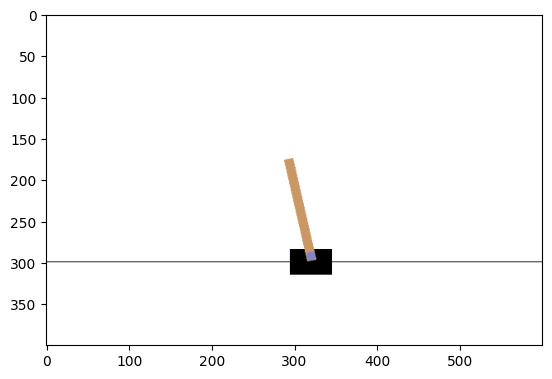

In [11]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def render(history):
    fig, ax = plt.subplots()
    screen = plt.imshow(history[0])
    animate = lambda i: screen.set_data(history[i])
    ani = FuncAnimation(fig, animate, frames=np.arange(0, len(history)), interval=80, repeat=False)
    return HTML(ani.to_jshtml())

render(history)

In [16]:
from langchain.prompts import PromptTemplate

context = "You are an AI agent. " \
    + "You will be given an observation and you will reply with the optimal action to be taken at that particular state."

task = "The task is the cart-pole problem. " \
    + "A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. " \
    + "The pendulum is placed upright on the cart and " \
    + "the goal is to balance the pole by applying forces in the left and right direction on the cart."

specs = "The possible actions are to push the cart to the left or to push it to the right. " \
    + "The observation has 4 values corresponding to cart position, cart velocity, pole angle and pole angular velocity." \
    + "The cart position ranges from -4.8 to 4.8, the cart velocity ranges from -inf to inf, " \
    + "the pole angle ranges from -0.418 rad to 0.418 rad, and the pole angular velocity ranges from -inf to inf."

curr_obs = "The observation at the current time step is {obs}. " \
    + "Specify the optimal action at the current time step with 1 word (left/right): "

prompt = PromptTemplate(
    input_variables=["obs"],
    template=context+task+specs+curr_obs,
)

In [17]:
llm = OpenAI(model_name="gpt-3.5-turbo", temperature=0)

In [18]:
llm(prompt.format(obs=list(obs)))

'Right.'

In [19]:
input_prompt = context + task + specs + f"The observation at the current time step is {obs}. Specify the optimal action at the current time step with 1 word (left/right), and justify: "
llm(input_prompt)

'\n\nRight. \n\nThe pole is leaning towards the left, so pushing the cart to the right will help balance the pole and prevent it from falling over.'

In [20]:
dynamics = "When the cart is pushed right, the pole will lean to the left, and when the cart is pushed left, the pole will lean to the right."

input_prompt = context + task + dynamics + specs + f"The observation at the current time step is {obs}. Specify the optimal action at the current time step (left/right): "
llm(input_prompt)

'\n\nBased on the current observation, the optimal action would be to push the cart to the right.'

In [21]:
from langchain.llms import OpenAIChat

llm = OpenAIChat(model_name="gpt-4")
llm(input_prompt)

'left'

In [22]:
input_prompt = context + task + specs + f"The observation at the current time step is {obs}. Specify the optimal action at the current time step with 1 word (left/right), and justify: "
llm(input_prompt)

"left\n\nJustification: The cart is already moving to the right (positive cart velocity) and the pole has a significant negative angle towards the left. Also, the pole angular velocity is negative, meaning it's falling towards the left. Hence, pushing the cart to the left would help stabilize the pole."

In [25]:
curr_obs = "The observation at the current time step is {obs}. Specify the optimal action at the current time step with 1 word (left/right), and justify: "
prompt = PromptTemplate(
    input_variables=["obs"],
    template=context+task+specs+curr_obs,
)

In [30]:
import gym

env = gym.make("CartPole-v1", render_mode="rgb_array")

obs, _ = env.reset()
history = [env.render()]

llm = OpenAIChat(model_name="gpt-4", temperature=0)

for t in range(50):
    
    output = llm(prompt.format(obs=list(obs))).lower()
    print(f"\n\nTime {t}: {list(obs)} -> {output}")
    
    if "left" == output[:4]:
        action = 0
    elif "right" == output[:5]:
        action = 1
    else:
        print("Invalid output:", output)
        break
        
    obs, rew, term, trun, _ = env.step(action)

    history.append(env.render())

    if term or trun:
        print("Episode length:", len(history))
        break

env.close()



Time 0: [0.008021403, 0.03699356, 0.030458508, -0.01280481] -> right

justification: the cart position (0.008021403) is slightly to the left, and the cart velocity (0.03699356) is positive, meaning the cart is moving to the right. the pole angle (0.030458508) is positive, indicating that the pole is leaning to the right, and the pole angular velocity (-0.01280481) is negative, meaning the pole is rotating back towards the center. to maintain balance and counteract the pole's rotation, the optimal action is to push the cart to the right.
Right


/opt/homebrew/Caskroom/miniforge/base/envs/llm4sdm/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):




Time 1: [0.008761274, 0.23166576, 0.030202411, -0.29572424] -> right

justification: the cart has a positive velocity (0.23166576) which means it is moving to the right. the pole angle is positive (0.030202411) which means it is leaning to the right. the pole angular velocity is negative (-0.29572424) which means the pole is rotating counterclockwise. in this situation, pushing the cart to the right will help counteract the counterclockwise rotation and keep the pole balanced.
Right


Time 2: [0.01339459, 0.42634442, 0.024287928, -0.5787309] -> right

justification: the cart has a positive velocity (0.42634442) which means it is moving to the right. the pole angle is also positive (0.024287928), indicating that it is leaning to the right. however, the pole has a negative angular velocity (-0.5787309), which means it is rotating counter-clockwise and trying to fall to the left. to counteract this rotation and keep the pole balanced, the optimal action is to push the cart to the right.

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: The server had an error while processing your request. Sorry about that!.




Time 13: [0.10370739, -0.15008107, -0.106504664, 0.10302764] -> left

justification: the cart position is positive (0.10370739), meaning it is slightly to the right of the center. the cart velocity is negative (-0.15008107), indicating that the cart is moving to the left. the pole angle is negative (-0.106504664), which means the pole is leaning towards the left. the pole angular velocity is positive (0.10302764), indicating that the pole is rotating counterclockwise. to counteract the pole's rotation and bring it back to the upright position, the optimal action is to push the cart to the left.
Left


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: The server had an error while processing your request. Sorry about that!.




Time 14: [0.100705765, -0.34352824, -0.10444411, 0.36030105] -> right

justification: the cart position (0.100705765) is slightly to the right, and the cart velocity (-0.34352824) is negative, meaning the cart is moving to the left. the pole angle (-0.10444411) is negative, which means the pole is leaning to the left, and the pole angular velocity (0.36030105) is positive, indicating that the pole is moving towards the right. to balance the pole, we should push the cart to the right to counteract the leftward lean and movement of the cart.
Right


Time 15: [0.0938352, -0.14708872, -0.097238086, 0.03659666] -> left

justification: the cart position is positive (0.0938352), meaning it is slightly to the right of the center. the cart velocity is negative (-0.14708872), indicating that the cart is moving to the left. the pole angle is negative (-0.097238086), which means the pole is leaning towards the left. the pole angular velocity is positive (0.03659666), showing that the pole is rot

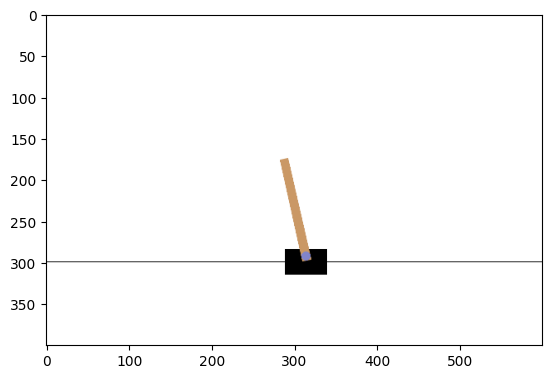

In [31]:
render(history)